In [1]:
## tensorflow, keras(프랑스-google) :
## pytorch(facebook)
# pip install tensorflow
# pip install keras

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import numpy
import sys
import tensorflow as tf

In [4]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


In [6]:
print(X_train.shape) # 공부시킬 데이터의 문제(이미지 정보)-1개 이미지당 784개 정보
print(Y_train.shape) # 공부시킬 데이터의 답(숫자 정보)-1개 이미지당 숫자 값

(60000, 28, 28)
(60000,)


In [7]:
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28)
(10000,)


In [8]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


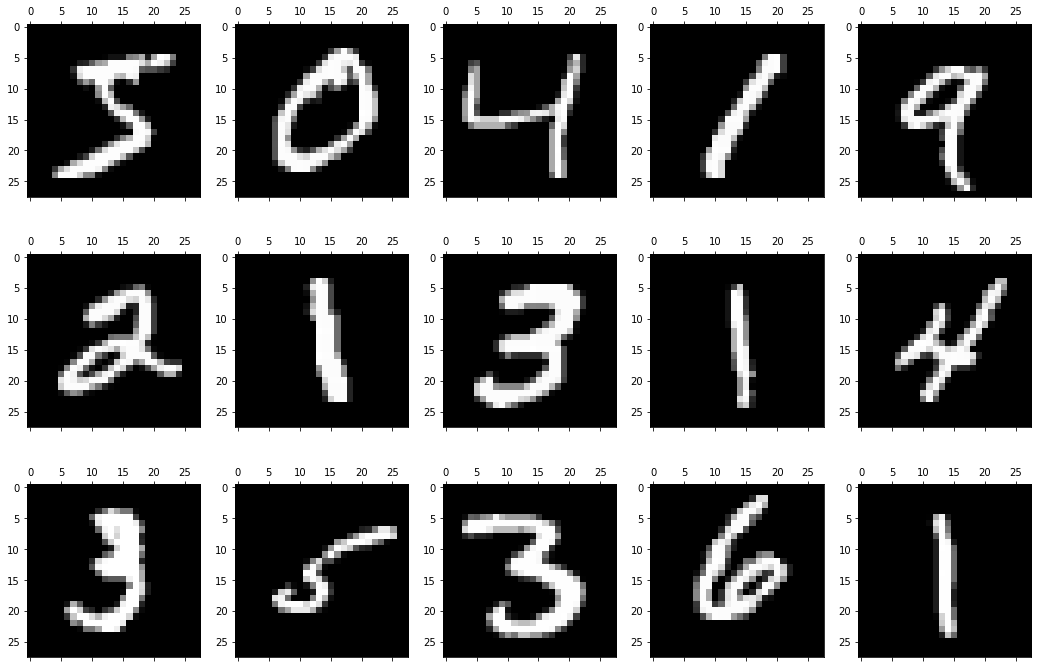

In [9]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(Y_train[0:15]))

col=0 
for row in range(0,3):
  col = row * 5
  axes[row][0].matshow(X_train[col])
  axes[row][1].matshow(X_train[col+1])
  axes[row][2].matshow(X_train[col+2])    
  axes[row][3].matshow(X_train[col+3])
  axes[row][4].matshow(X_train[col+4])

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 784) # (60000,28,28) => (60000,784)
X_train.astype('float64')
X_train = X_train/255


In [12]:
X_train.shape

(60000, 784)

In [13]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
X_test = X_test.reshape(X_test.shape[0], 784) # (60000,28,28) => (60000,784)
X_test.astype('float64')
X_test = X_test/255   # RGB 컬러값 0~255, 신경망의 값은 0~1 값이 적당해서 255로 나눠줌

In [15]:
Y_train1 = np_utils.to_categorical(Y_train, 10)
Y_test1 = np_utils.to_categorical(Y_test, 10)

In [16]:
print(Y_train[0:5])

[5 0 4 1 9]


In [17]:
Y_train1[0:5] # one-hot encoding

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
m = Sequential()

In [19]:
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(10, activation='softmax'))

In [20]:
## 오차함수(categorical_crossentropy), 최적화함수:adam
m.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [21]:
mkdir model

In [22]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
            monitor='val_loss',
            verbose=1, save_best_only=True)
#10회 이상 성능향상이 없다면 중단하라
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
###샘플 200, 모두 30번 실행,
history = m.fit(X_train, Y_train1, validation_data=(X_test, Y_test1),
                    epochs=30,
                    batch_size=200,
                    verbose=2,
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.2998 - acc: 0.9165 - val_loss: 0.1555 - val_acc: 0.9539

Epoch 00001: val_loss improved from inf to 0.15549, saving model to ./model/01-0.1555.hdf5
Epoch 2/30
 - 5s - loss: 0.1249 - acc: 0.9639 - val_loss: 0.1052 - val_acc: 0.9691

Epoch 00002: val_loss improved from 0.15549 to 0.10518, saving model to ./model/02-0.1052.hdf5
Epoch 3/30
 - 5s - loss: 0.0823 - acc: 0.9762 - val_loss: 0.0851 - val_acc: 0.9744

Epoch 00003: val_loss improved from 0.10518 to 0.08507, saving model to ./model/03-0.0851.hdf5
Epoch 4/30
 - 5s - loss: 0.0610 - acc: 0.9824 - val_loss: 0.0800 - val_acc: 0.9745

Epoch 00004: val_loss improved from 0.08507 to 0.08003, saving model to ./model/04-0.0800.hdf5
Epoch 5/30
 - 5s - loss: 0.0458 - acc: 0.9869 - val_loss: 0.0673 - val_acc: 0.9792

Epoch 00005: val_loss improved from 0.08003 to 0.06725, saving model to ./model/05-0.0673.hdf5
Epoch 6/30
 - 5s - loss: 0.0344 - acc: 0.9906 - val_loss: 0

In [24]:
print('\nAcuuracy: {:.4f}'.format(m.evaluate(X_test, Y_test1)[1]))

10000/10000 [==============================] - 1s 108us/step

Acuuracy: 0.9815
